In [13]:
#clean dataframe
import pandas as pd
df = pd.read_csv('modified-data.csv')
df = df.drop(['box_art_url', 'igdb_id'], axis=1)
new_column_order=['id','name','platforms','developers','publishers','initial_release_date','genres','engine','modes','base_cost_on_steam']
df=df[new_column_order]
df.to_csv('is310-final-project-data.csv', index=False) 
df

,id,name,platforms,developers,publishers,initial_release_date,genres,engine,modes,base_cost_on_steam
0,263490,Rust,"PlayStation 4,Microsoft Windows,Linux,macOS,Xb...","Facepunch Studios,Double Eleven","Facepunch Studios,Double Eleven,Plaion",2013-12-11,"FPS Shooter,RPG,Adventure Game,Indie Game,Surv...",Unity,Multiplayer,39.99
1,33214,Fortnite,"macOS,Windows,PlayStation 4,Xbox One,iOS,Ninte...",Epic Games,Epic Games,2017-07-25,"Shooter,RPG,Simulation,Strategy,Adventure Game...",Unreal Engine 5,Multiplayer,NaN
2,32982,Grand Theft Auto V,"PlayStation 4,PlayStation 5,PlayStation 3,Xbox...",Rockstar North,Rockstar Games,2013-09-17,"FPS,Shooter,Driving/Racing Game,Adventure Game...",RAGE,"Single-player,Multiplayer",39.98
3,1672324422,Call of Duty: Black Ops 6,"PlayStation 5,Xbox Series X and Series S,PlayS...","Treyarch,Raven Software",Activision,2024-10-25,"FPS,Shooter,Action",IW,"Single-player,Multiplayer",69.99
4,21779,League of Legends,"macOS,Microsoft Windows,Mac operating systems",Riot Games,Riot Games,2009-10-27,"RPG,Strategy MOBA,Action",Proprietary Engine,Multiplayer,0.00
...,...,...,...,...,...,...,...,...,...,...
79,32502,World of Warships,"Microsoft Windows,iOS,Android,PlayStation 4,Pl...",Wargaming,Wargaming,2015-09-17,"FPS,Shooter,RTS,Strategy,Simulation",BigWorld,Multiplayer,0.00
80,515024,Diablo IV,"PlayStation 5,PlayStation 4,Xbox Series X and ...","Blizzard Entertainment,Team 3",Blizzard Entertainment,2023-06-05,"RPG,Action,Horror,Adventure Game,MMO",Proprietary Engine,"Single-player,Multiplayer",49.99
81,538054672,TEKKEN 8,"PlayStation 5,Xbox Series X and Series S,Micro...","BANDAI NAMCO Studios,Tekken Project,ARIKA",Bandai Namco Entertainment,2024-01-26,"Fighting,Action,Arcade",Unreal Engine 5,"Single-player,Multiplayer",69.99
82,456845141,Zenless Zone Zero,"PlayStation 5,Microsoft Windows,Android,iOS",miHoYo,miHoYo,2024-07-04,"RPG,Adventure Game,Action",Unity,Single-player,NaN


In [14]:
multi_value_columns = ['platforms', 'developers', 'publishers', 'genres', 'modes'] #Creates a list of column names
for column in multi_value_columns:
    df[column] = df[column].apply(lambda x: x.split(',') if isinstance(x, str) else x) #Splits string into list

In [15]:
#list of all platforms
platforms_expanded = df.explode('platforms')
each_platform=platforms_expanded['platforms'].unique()
print(each_platform)

['PlayStation 4' 'Microsoft Windows' 'Linux' 'macOS' 'Xbox One'
 'Mac operating systems' 'Windows' 'iOS' 'Nintendo Switch' 'Android'
 'Xbox Series X/S' 'PlayStation 5' 'PlayStation 3' 'Xbox 360'
 'Xbox Series X and Series S' 'Xbox Cloud Gaming' 'Google Stadia' 'iPadOS'
 'Raspberry Pi' 'Windows Phone' 'Fire OS' 'PlayStation Vita' 'Wii U'
 'Apple TV' 'tvOS' 'New Nintendo 3DS' 'ChromeOS' 'GeForce Now' 'OS X'
 'Mac OS X' 'Xbox' 'Sega Saturn' 'Stadia' 'GameCube' 'PlayStation 2' 'Wii'
 'Zeebo' 'Oculus Quest 2' '3DO' 'Dreamcast' 'MacOS' 'Web browser'
 'Arcade video game' 'Meta Quest 2' 'Meta Quest Pro' 'BlackBerry' 'J2ME'
 'Nintendo DS' 'Nokia N-Gage' 'PlayStation' 'Flash']


In [16]:
developers_expanded = df.explode('developers')
each_developer=developers_expanded['developers'].unique()
print(each_developer)

['Facepunch Studios' 'Double Eleven' 'Epic Games' 'Rockstar North'
 'Treyarch' 'Raven Software' 'Riot Games' 'Ubisoft Montreal'
 'Mojang Studios' 'EA Vancouver' 'EA Romania' 'Blizzard Entertainment'
 'Valve' 'Respawn Entertainment' 'Turtle Rock Studios'
 'Hidden Path Entertainment' 'Gearbox Software' 'Ritual Entertainment'
 'Nexon' 'Sora Ltd.' 'Masahiro Sakurai' 'BANDAI NAMCO Studios'
 'Nintendo Entertainment Planning & Development' 'Digital Factory'
 'Behaviour Interactive' 'Infinity Ward' 'PUBG Studios' 'Mossmouth'
 'Moppin' 'Eirik Suhrke' 'Jon Perry' 'Tyriq Plummer' 'Paul Hubans' 'LLC'
 'Temple Gates Games' 'Crytek' 'Radatomic Studios' 'Capcom'
 'Battlestate Games' 'EricLostie' 'Psyonix' 'FromSoftware Inc.'
 'New World Computing' 'Loki Software' 'DotEmu' 'CipSoft' 'Keen Games'
 'Paradox Development Studio' 'Kinetic Games' 'Supercell' 'NCSOFT'
 'NC Studio' 'Bloober Team' 'Nintendo EAD' 'Nintendo EPD' 'Ubisoft Nadeo'
 'The Pokémon Company' 'DeNA' 'Creatures Inc.' 'Grinding Gear Games'

In [17]:
# The dictionary of developer categories
types_of_developers={
    'AAA': ['Rockstar North','Treyarch','Riot Games','Ubisoft Montreal','EA Vancouver','EA Romania',
            'Blizzard Entertainment','Valve','Nintendo Entertainment Planning & Development','Capcom','FromSoftware Inc.','Loki Software',
            'Nintendo EAD','Nintendo EPD','Ubisoft Nadeo','HoYoverse','343 Industries','Rockstar Games','Rockstar San Diego','Amazon Games','Amazon Games Orange County'
            'Visual Concepts','Square Enix Business Division 5','BioWare'],
    'AA': ['Facepunch Studios','Gearbox Software','Infinity Ward','PUBG Studios','Crytek','Paradox Development Studio','Grinding Gear Games','Bungie','Roblox Corporation','Bohemia Interactive Studio','Frontier Developments'],
    'Indie': ['Double Eleven','Epic Games','Raven Software','Mojang Studios','Respawn Entertainment','Turtle Rock Studios',
              'Hidden Path Entertainment','Ritual Entertainment','Nexon','Sora Ltd.','BANDAI NAMCO Studios', 'Digital Factory',
              'Behaviour Interactive','Mossmouth','Moppin','Temple Gates Game','Radatomic Studios','Battlestate Games','EricLostie',
              'Psyonix','New World Computing','CipSoft','Keen Games','Kinetic Games','Supercell','NCSOFT','Bloober Team','Jagex','Sledgehammer Games','Radical Entertainment',
              'Pearl Abyss','IRONMACE','Nicalis','Coal Supper','Sandbox Interactive','Wube Software','Absolute Entertainment','Cloud Imperium Games','Relentless Game Studios','OPNeon Games',
              'lamedeveloper','Wargaming','VRChat Inc','Starbreeze Studios','Intrepid Studios','GIANTS Software','EXBO','Game Freak','Tango Gameworks','Smilegate','Smile Gate RPG Inc.','Tripod Studio',
              'Smilegate Entertainment','Team 3','miHoYo','Ankama Games']
}

In [18]:
# Function to categorize a single developer
def categorize_developers(developer):
    categories = set()  # Create a set to store categories for each developer
    for category, keywords in types_of_developers.items():  # types_of_developers is accessed directly
        if developer in keywords:  # Check if the platform is in the list of keywords for the category
            categories.add(category)  # Add the category if matched
    return list(categories) if categories else ['Unknown']  # Return the categories or 'Unknown' if no match
# Function to categorize a list of platforms
def categorize_developers_list(developer_list):
    categories = set()
    for developer in developer_list:  # Loop through each platform in the list
        categories.update(categorize_developers(developer))  # Add categories for each platform
    return list(categories) if categories else ['Unknown']  # Return combined categories

In [19]:
each_developer=developers_expanded['developers'].unique() # Unique platforms as a NumPy array
# Categorize each platform
categorized_developers = [categorize_developers_list(developer) for developer in each_developer]
print(categorized_developers)

[['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown'], ['Unknown']

In [20]:
df['type_of_developer'] = df['developers'].apply(categorize_developers_list)
print(df[['developers', 'type_of_developer']].head())

                           developers type_of_developer
0  [Facepunch Studios, Double Eleven]       [Indie, AA]
1                        [Epic Games]           [Indie]
2                    [Rockstar North]             [AAA]
3          [Treyarch, Raven Software]      [Indie, AAA]
4                        [Riot Games]             [AAA]


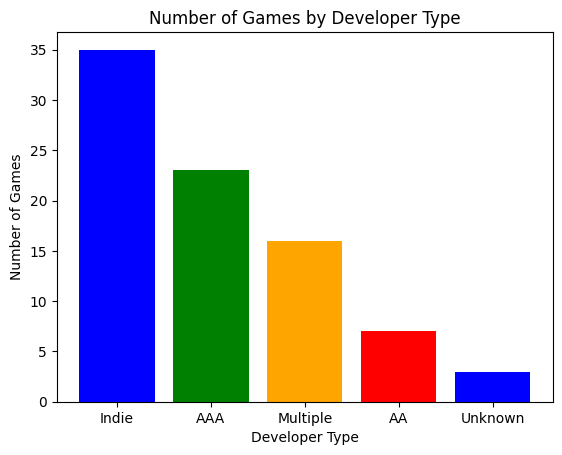

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def simplify_category(categories):
    if len(categories) > 1:
        return 'Multiple'
    return categories[0]

df['simplified_category'] = df['type_of_developer'].apply(simplify_category)

# Count games in each category
category_counts = df['simplified_category'].value_counts()

# Plot using Matplotlib
plt.bar(category_counts.index, category_counts.values, color=['blue', 'green', 'orange', 'red'])
plt.title('Number of Games by Developer Type')
plt.xlabel('Developer Type')
plt.ylabel('Number of Games')
plt.show()


In [22]:
# The dictionary of platform categories
types_of_platforms={
    'PC': ['ChromeOS','Linux','Mac OS X','Mac operating systems','MacOS','Microsoft Windows','OS X','Windows','macOS'],
    'Console': ['3DO','Dreamcast','GameCube','Google Stadia','New Nintendo 3DS','Nintendo DS','Nintendo Switch','PlayStation','PlayStation 2', 
                'PlayStation 3','PlayStation 4','PlayStation 5','PlayStation Vita','Sega Saturn','Stadia','Wii','Wii U','Xbox','Xbox 360',
                'Xbox Cloud Gaming','Xbox One','Xbox Series X and Series S','Xbox Series X/S','Zeebo'],
    'Mobile': ['Android','BlackBerry','Fire OS','J2ME','Nokia N-Gage','Windows Phone','iOS','iPadOS'],
    'Web': ['Flash','Web browser'],
    'Other': ['Apple TV','Arcade video game','GeForce Now','Meta Quest 2','Meta Quest Pro','Oculus Quest 2','Raspberry Pi','tvOS']
}

In [23]:
# Function to categorize a single platform
def categorize_platform(platform):
    categories = set()  # Create a set to store categories for each platform
    for category, keywords in types_of_platforms.items():  # types_of_platforms is accessed directly
        if platform in keywords:  # Check if the platform is in the list of keywords for the category
            categories.add(category)  # Add the category if matched
    return list(categories) if categories else ['Unknown']  # Return the categories or 'Unknown' if no match
# Function to categorize a list of platforms
def categorize_platforms_list(platform_list):
    categories = set()
    for platform in platform_list:  # Loop through each platform in the list
        categories.update(categorize_platform(platform))  # Add categories for each platform
    return list(categories) if categories else ['Unknown']  # Return combined categories

In [24]:
each_platform = platforms_expanded['platforms'].unique() # Unique platforms as a NumPy array
# Categorize each platform
categorized_platforms = [categorize_platform(platform) for platform in each_platform]
print(categorized_platforms)

[['Console'], ['PC'], ['PC'], ['PC'], ['Console'], ['PC'], ['PC'], ['Mobile'], ['Console'], ['Mobile'], ['Console'], ['Console'], ['Console'], ['Console'], ['Console'], ['Console'], ['Console'], ['Mobile'], ['Other'], ['Mobile'], ['Mobile'], ['Console'], ['Console'], ['Other'], ['Other'], ['Console'], ['PC'], ['Other'], ['PC'], ['PC'], ['Console'], ['Console'], ['Console'], ['Console'], ['Console'], ['Console'], ['Console'], ['Other'], ['Console'], ['Console'], ['PC'], ['Web'], ['Other'], ['Other'], ['Other'], ['Mobile'], ['Mobile'], ['Console'], ['Mobile'], ['Console'], ['Web']]


In [25]:
#Add 'platform categories'as new column
df['platform_categories'] = df['platforms'].apply(categorize_platforms_list)
print(df[['platforms', 'platform_categories']].head())

                                           platforms    platform_categories
0  [PlayStation 4, Microsoft Windows, Linux, macO...          [Console, PC]
1  [macOS, Windows, PlayStation 4, Xbox One, iOS,...  [Mobile, Console, PC]
2  [PlayStation 4, PlayStation 5, PlayStation 3, ...          [Console, PC]
3  [PlayStation 5, Xbox Series X and Series S, Pl...          [Console, PC]
4  [macOS, Microsoft Windows, Mac operating systems]                   [PC]


In [26]:
# Explode the 'platform_categories' column to get each category in a separate row
df_exploded = df.explode('platform_categories')

# Count the occurrences of each platform category
top_platform_categories = df_exploded['platform_categories'].value_counts()
print(top_platform_categories)

platform_categories
PC         77
Console    57
Mobile     25
Other      17
Web         2
Name: count, dtype: int64


In [27]:
# Explode the 'developers' column to get each category in a separate row
df_exploded = df.explode('developers')

# Count the occurrences of each developers
top_developers = df_exploded['developers'].value_counts()
print(top_developers.head(10))

developers
Blizzard Entertainment    4
Riot Games                4
Valve                     3
Raven Software            3
Wargaming                 2
BANDAI NAMCO Studios      2
Infinity Ward             2
Mossmouth                 2
Treyarch                  2
Capcom                    2
Name: count, dtype: int64


In [28]:
# Explode the 'publishers' column to get each category in a separate row
df_exploded = df.explode('publishers')

# Count the occurrences of each publisher
top_publishers = df_exploded['publishers'].value_counts()
print(top_publishers.head(10))

publishers
Riot Games                4
Electronic Arts           4
Blizzard Entertainment    4
Amazon Games              3
Rockstar Games            3
Activision                3
Ubisoft                   3
Nintendo                  3
Valve                     3
Wargaming                 2
Name: count, dtype: int64


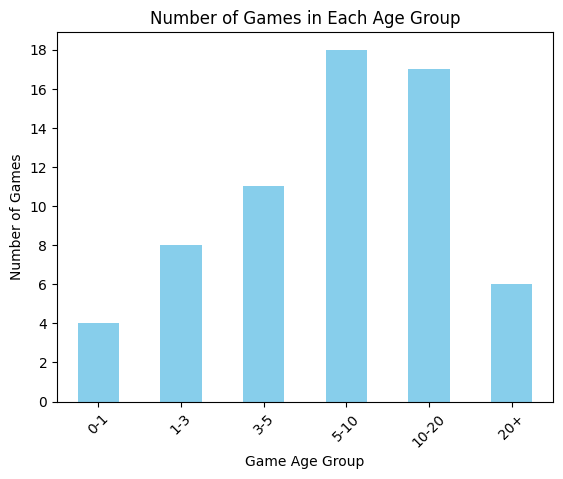

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'initial_release_date' column to datetime, handling errors
df['initial_release_date'] = pd.to_datetime(df['initial_release_date'], errors='coerce')

#Calculate game age
df['game_age'] = (pd.to_datetime('today') - df['initial_release_date']).dt.days / 365.25

# Round game age to nearest whole year
df['game_age'] = round(df['game_age'])

#Group games by age bins
age_bins = [0, 1, 3, 5, 10, 20, 100]
age_labels = ['0-1', '1-3', '3-5', '5-10', '10-20', '20+']
df['age_group'] = pd.cut(df['game_age'], bins=age_bins, labels=age_labels)

#Count the number of games in each age group
age_group_counts = df['age_group'].value_counts().sort_index()

# Step 3: Plot the counts in a bar plot
age_group_counts.plot(kind='bar', color='skyblue', title='Number of Games in Each Age Group')
plt.xlabel('Game Age Group')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.yticks(range(0, int(age_group_counts.max()) + 2, 2))
plt.show()

In [30]:
print(df['game_age'].median(),df['game_age'].mean())

6.0 7.493670886075949


In [31]:
print(df['game_age'].mean())

7.493670886075949


In [32]:
# Explode the 'genre' column to get each category in a separate row
df_exploded = df.explode('genres')

# Count the occurrences of each publisher
top_genres = df_exploded['genres'].value_counts()
print(top_genres.head(10))

genres
Action            53
Adventure Game    37
RPG               35
Shooter           30
FPS               23
Simulation        18
Strategy          18
MMO               18
Open World        18
Arcade             9
Name: count, dtype: int64


In [33]:
# Explode the 'modes' column to get each category in a separate row
df_exploded = df.explode('modes')

# Count the occurrences of each publisher
top_modes = df_exploded['modes'].value_counts()
print(top_modes.head())

modes
Multiplayer      75
Single-player    44
Single player     4
Co-operative      4
Name: count, dtype: int64


In [34]:
#Find average cost of games
print(df['base_cost_on_steam'].mean())
print(df['base_cost_on_steam'].median())
print(df['base_cost_on_steam'].mode())

24.975862068965515
19.99
0    0.0
Name: base_cost_on_steam, dtype: float64


In [35]:
free_games = df[df['base_cost_on_steam'] == 0.0]

# Count the number of free games
num_free_games = free_games.shape[0]
print(num_free_games)

21
